### Import libraries

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import librosa.display
from IPython.display import Audio

### Read data

In [47]:
music_data = pd.read_csv('/home/mzums/music_genre/file.csv') 
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [48]:
music_data['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

### Visualize genres

Blue


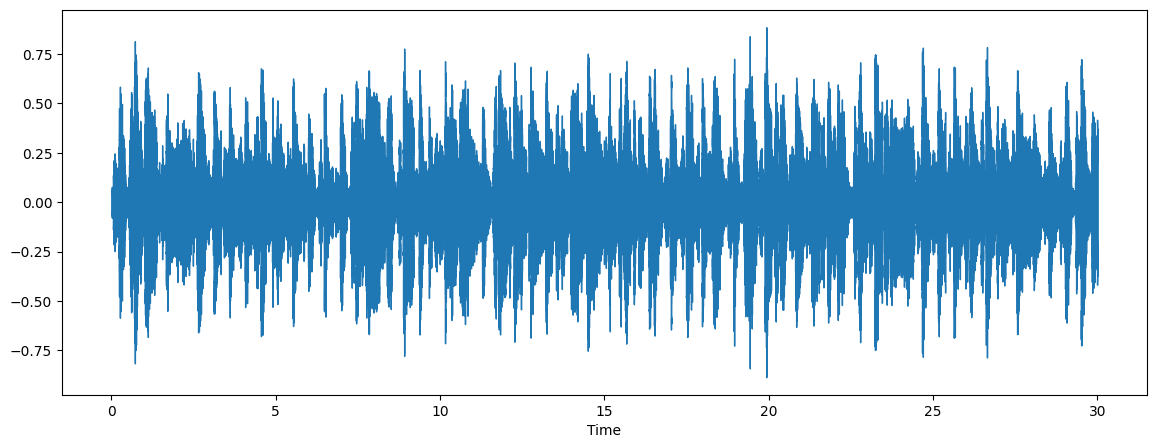

In [49]:
path = '/home/mzums/music_genre/genres_original/blues/blues.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 
Audio(path) 
  
print("Blue")

Metal


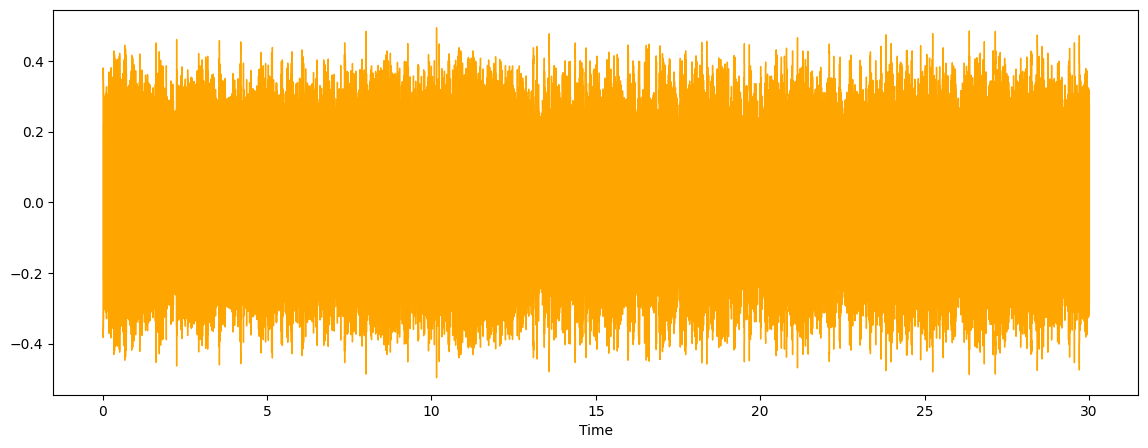

In [50]:

path = '/home/mzums/music_genre/genres_original/metal/metal.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr,color='orange') 
Audio(path) 
  
print("Metal")


Pop


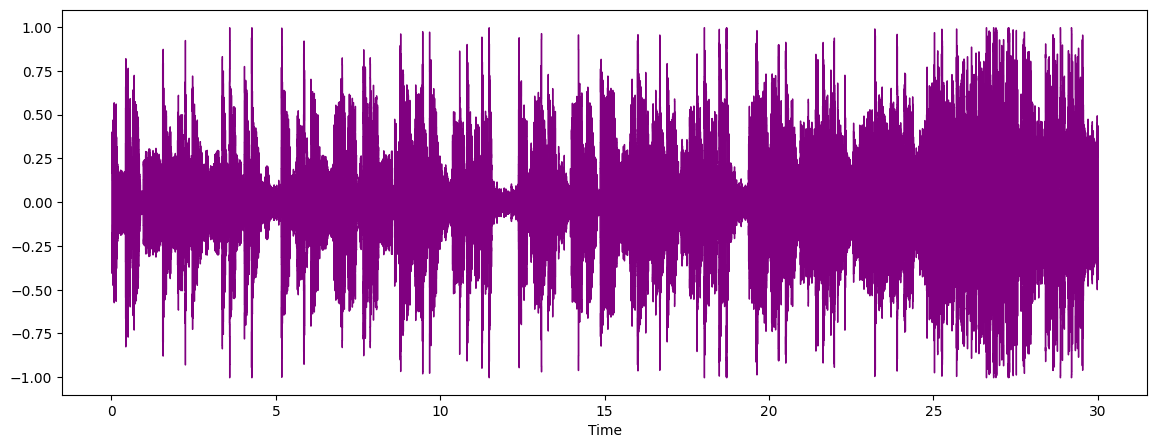

In [51]:

path = '/home/mzums/music_genre/genres_original/pop/pop.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr,color='purple') 
Audio(path) 
  
print("Pop")


HipHop


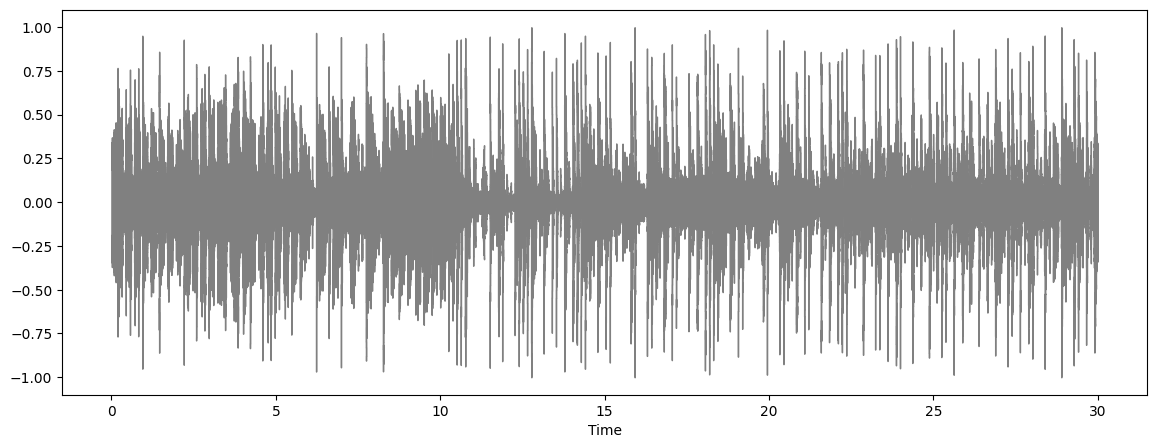

In [52]:

path = '/home/mzums/music_genre/genres_original/hiphop/hiphop.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr,color='grey') 
Audio(path) 
  
print("HipHop")


### Visualize mean variables

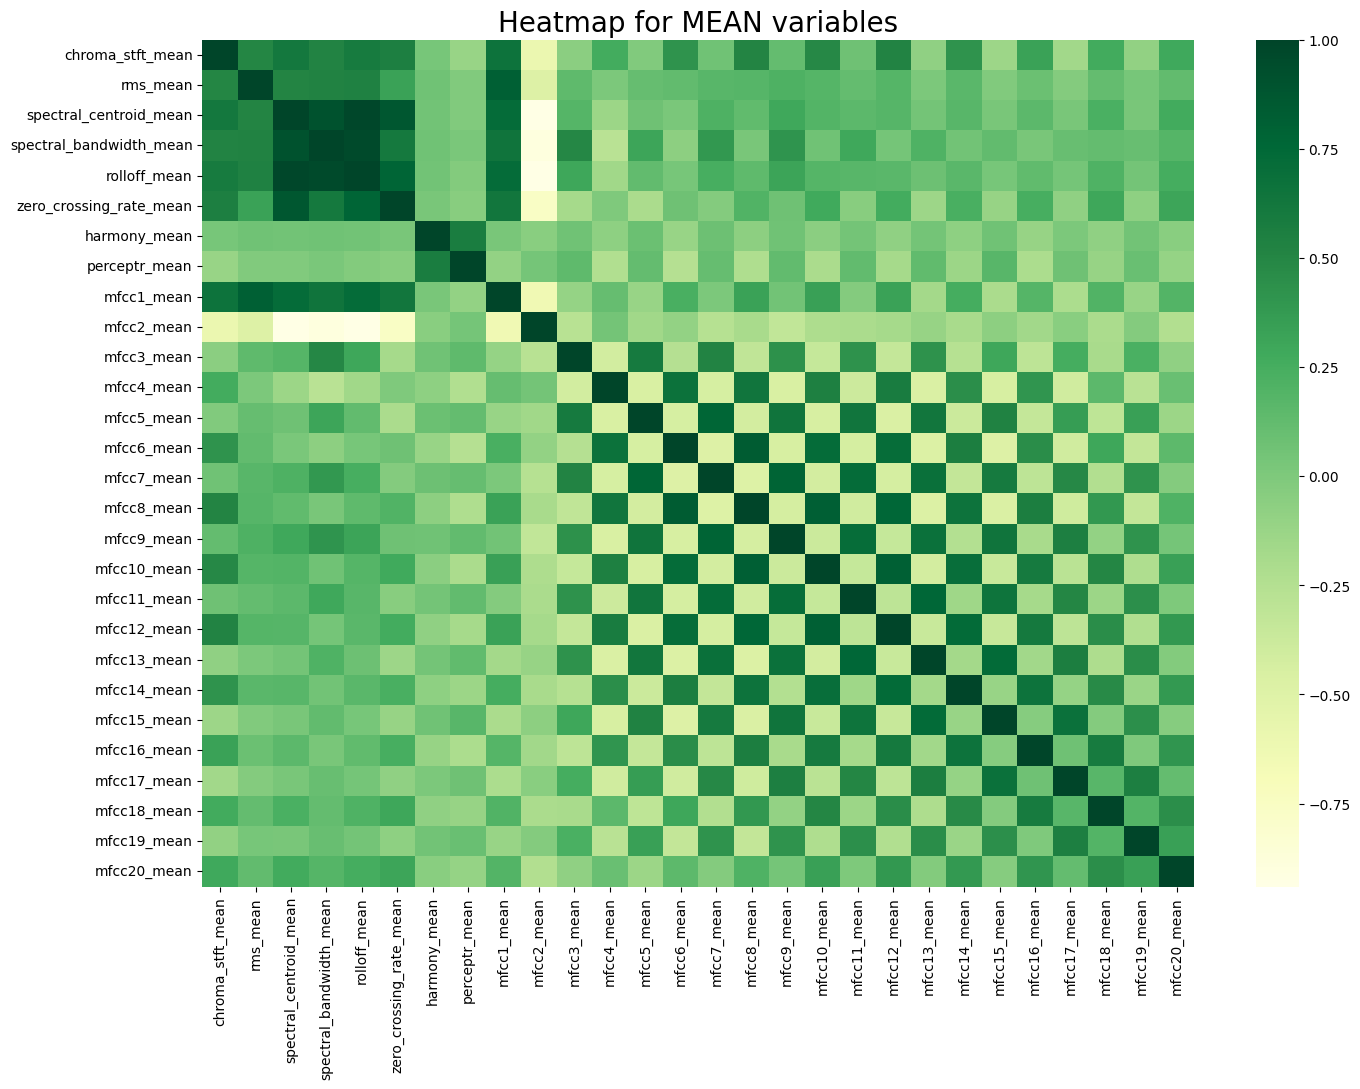

In [53]:
import numpy as np 
import seaborn as sns 
  
spike_cols = [col for col in music_data.columns if 'mean' in col] 
  
f, ax = plt.subplots(figsize=(16, 11)); 
  
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn') 
  
plt.title('Heatmap for MEAN variables', fontsize = 20) 
plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10);


### Prepare data

In [54]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
music_data['label'] = label_encoder.fit_transform(music_data['label'])

In [55]:
X = music_data.drop(['label','filename'],axis=1) 
y = music_data['label']

In [56]:
cols = X.columns 
minmax = preprocessing.MinMaxScaler() 
np_scaled = minmax.fit_transform(X) 
  
X = pd.DataFrame(np_scaled, columns = cols)

In [57]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.3,  
                                                    random_state=111) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 58), (300, 58), (700,), (300,))

### Random Forest

In [58]:
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
  
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 
  
for clf in (rf, xgb): 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test) 
    print(clf.__class__.__name__,accuracy_score(y_test, preds))


RandomForestClassifier 0.78
XGBClassifier 0.7833333333333333


### Visualize error and accuracy

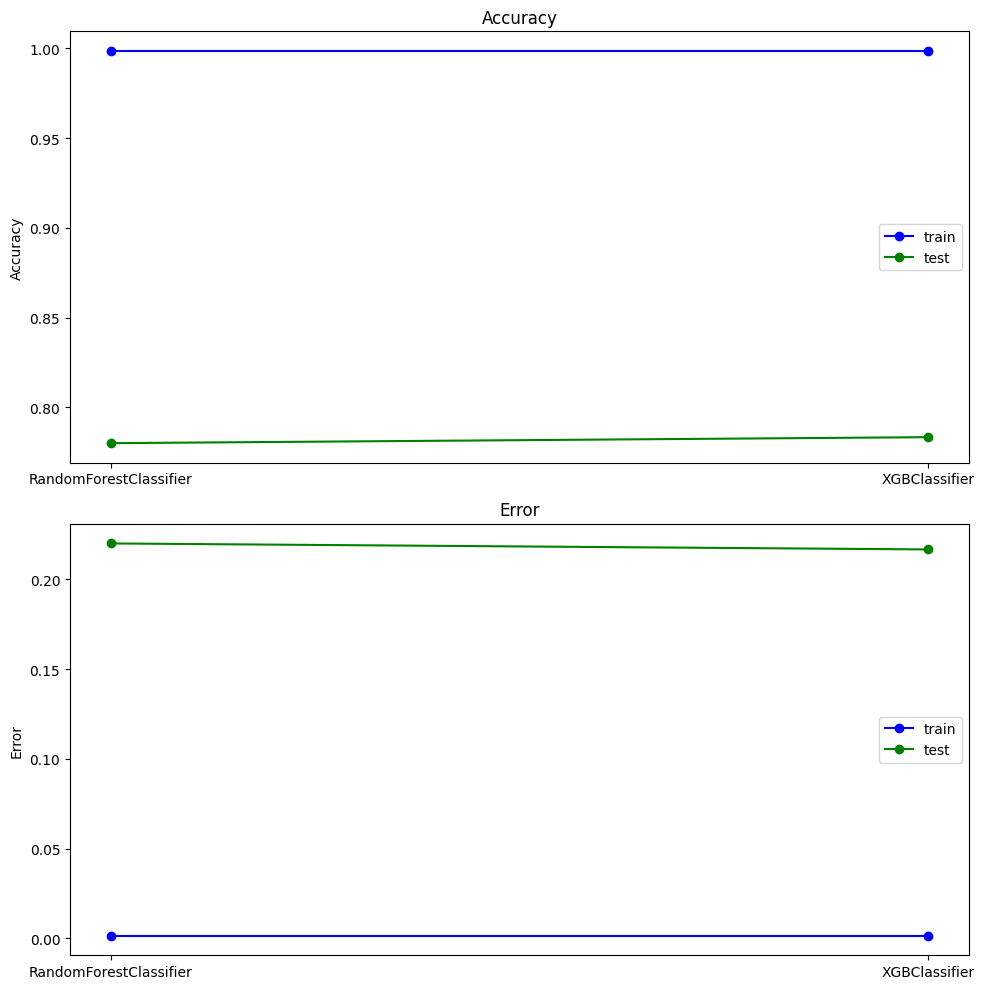

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

for clf in [rf, xgb]:
    clf.fit(X_train, y_train)
    
    train_preds = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)
    train_accuracies.append(train_acc)
    train_error = 1 - train_acc
    train_errors.append(train_error)

    test_preds = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    test_accuracies.append(test_acc)
    test_error = 1 - test_acc
    test_errors.append(test_error)

fig, axs = plt.subplots(2, figsize=(10, 10))

axs[0].plot([clf.__class__.__name__ for clf in [rf, xgb]], train_accuracies, label="train", marker='o', color='blue')
axs[0].plot([clf.__class__.__name__ for clf in [rf, xgb]], test_accuracies, label="test", marker='o', color='green')
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy")
axs[0].legend()

axs[1].plot([clf.__class__.__name__ for clf in [rf, xgb]], train_errors, label="train", marker='o', color='blue')
axs[1].plot([clf.__class__.__name__ for clf in [rf, xgb]], test_errors, label="test", marker='o', color='green')
axs[1].set_ylabel("Error")
axs[1].set_title("Error")
axs[1].legend()

plt.tight_layout()
plt.show()


# Thanks for watching <3